In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from useful.utility import *
from pnp_problem.python.estimatePoseVectorDLT import *
from img_formation.python.poseVectorToTransformationMatrix import *
from img_formation.python.projectPoints import *

2.1

In [4]:
def get_imagePoints(img_idx) :
    n=int(len(detected_corners[img_idx])/2)
    imagePoints=np.zeros((n,2))
    for i in range(len(imagePoints)) :
        imagePoints[i][0]= detected_corners[img_idx][i*2]
        imagePoints[i][1]= detected_corners[img_idx][i*2+1]
    return imagePoints

In [16]:
# Load data
K = np.loadtxt('pnp_problem/data/K.txt')  # calibration matrix [3x3]
detected_corners = np.loadtxt('pnp_problem/data/detected_corners.txt')  # distortion coefficients [2x1]
p_W_corners = np.loadtxt('pnp_problem/data/p_W_corners.txt', delimiter=",")

# get the poseVector.txt
path = 'pnp_problem/data/images_undistorted'
num=len(all_files(path))
poseVector = []

for img_idx in range(1, num-1) :
    poseVector.append(estimatePoseVectorDLT(p_W_corners, get_imagePoints(img_idx), K, D=np.array([0,0,0,0])))
    
np.savetxt("pnp_problem/data/poseVector.txt", poseVector)

2.2

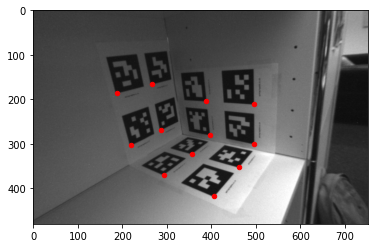

In [18]:
import matplotlib.pyplot as plt
from img_formation.python.poseVectorToTransformationMatrix import *
from img_formation.python.projectPoints import *
img_idx = 1
fname = "/img_{:04d}.jpg".format(img_idx)
pose_vectors = np.loadtxt('pnp_problem/data/poseVector.txt')
pose_vec = pose_vectors[img_idx]
RT = poseVectorToTransformationMatrix(pose_vec)  # R|T

p_W_corners_G = [[item[0] for item in p_W_corners],[item[1] for item in p_W_corners], [item[2] for item in p_W_corners] ]

ones = np.ones((1, len(p_W_corners_G[0])))
p_C_corners = np.concatenate((p_W_corners_G, ones))

projected_points = np.dot(RT, p_C_corners)
xpp, ypp = projectPoints(projected_points, K)

im = plt.imread(path+fname)
implot = plt.imshow(im)
plt.scatter(xpp, ypp, c='r', s=20)
plt.show()